# Pre-lecture HW 07 - Cayden Wong 2024/11/09

### 1. Explain succinctly in your own words (but working with a ChatBot if needed)...

Session Link for Q1: https://chatgpt.com/share/672fb7d2-5740-8012-b4e9-4014a75ea291

1) the difference between Simple Linear Regression and Multiple Linear Regression; and the benefit the latter provides over the former  
Simple linear regression models the relationship between a single predictor variable and an outcome variable. Multiple linear regression, as the name implies, models the relationship between multiple predictor variables and an outcome variable. Multiple linear regression is beneficial for analysing more complex relationships involving multiple predictor variables to provide evidence against more specific and complex hypotheses.

2) the difference between using a continuous variable and an indicator variable in Simple Linear Regression; and these two linear forms  
In simple linear regression, using a continuous variable models a straight line relationship between the predictor and outcome variable, where $\beta_1$ acts as the slope coefficient in the linear form $Y_i = \beta_0 + \beta_1(continuous)$. When using an indicator variable instead, the regression model models a binary relationship between the predictor variable and the outcome variable, where activating the indicator variable adds a constant change to the value of the outcome variable. In summary, continuous variables affect the slope of the graph whereas indicator variables affect the y-intercept of the model in the linear form $Y_i = \beta_0 + \beta_1 1(indicator)$.

3) the change that happens in the behavior of the model (i.e., the expected nature of the data it models) when a single indicator variable is introduced alongside a continuous variable to create a Multiple Linear Regression; and these two linear forms (i.e., the Simple Linear Regression versus the Multiple Linear Regression)  
Introducing an indicator variable alongside a continuous variable causes the regression model to split the data into two linear forms according to the value of the indicator variable. Effectively, the model creates two parallel lines, separated by a distance according to the coefficient attached to the indicator variable.

4) the effect of adding an interaction between a continuous and an indicator variable in Multiple Linear Regression models; and this linear form  
Adding an interaction between a continuous and indicator variable creates two distinct linear equations which variable slope coefficients and y-intercepts depending on the value of the indicator variable. Toggling the variable on/off changes both the slope coefficient and y-intercept of the model in the linear form $Y_i = \beta_0 + \beta_{A_0} 1(predictor A) + x_i(\beta_1 + \beta_{A_1} 1(predictor A))$

5) the behavior of a Multiple Linear Regression model (i.e., the expected nature of the data it models) based only on indicator variables derived from a non-binary categorical variable; this linear form; and the necessarily resulting binary variable encodings it utilizes  
When modeling an indicator variable with non-binary categorical data, the model represents several unique y-intercepts that change depending on which indicator category is activated. This created several groups of normally distributed data around different heights on a plot, since the value of the indicator variable will directly change the predictor variable by a constant value. $Y_i = \beta_0 + \beta_B 1_{[x_i = "B"]}(x_i) + \beta_C 1_{[x_i = "C"]}(x_i) + ...$

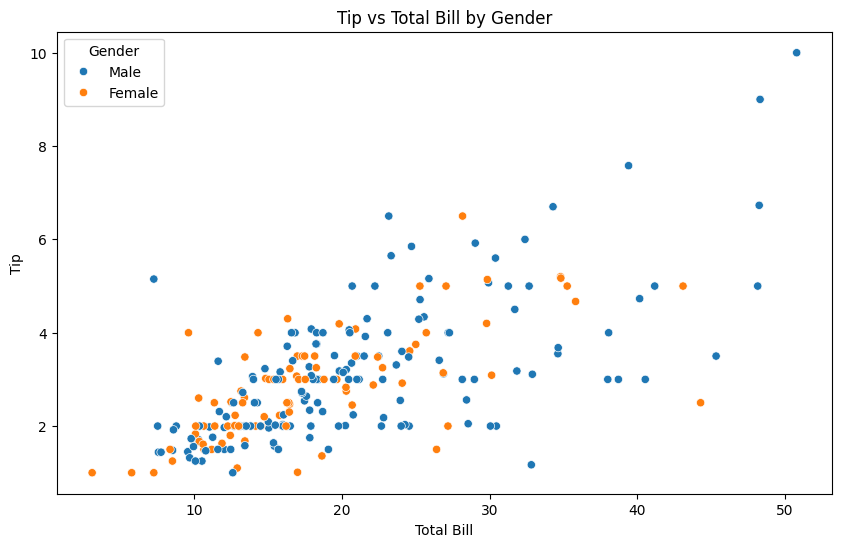

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     67.43
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.16e-31
Time:                        23:19:37   Log-Likelihood:                -350.37
No. Observations:                 244   AIC:                             708.7
Df Residuals:                     240   BIC:                             722.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

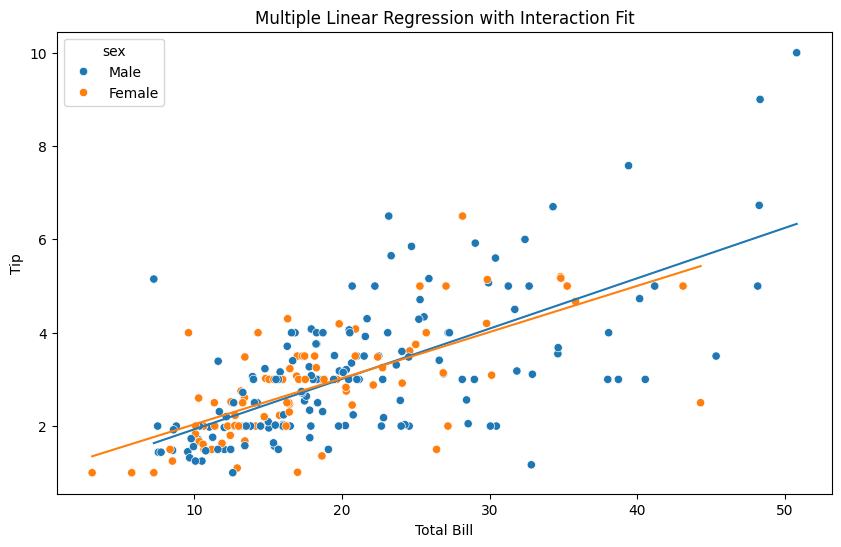

In [70]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Load the dataset
tips = sns.load_dataset("tips")

# Create an indicator variable for gender (1 for Female, 0 for Male)
tips['is_female'] = tips['sex'].apply(lambda x: 1 if x == 'Female' else 0)

# Scatter plot of tip vs total_bill, colored by gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Tip vs Total Bill by Gender')
plt.legend(title='Gender')
plt.show()

# Multiple Linear Regression with interaction between 'total_bill' and 'is_female'
model = smf.ols('tip ~ total_bill * is_female', data=tips).fit()

# Print the model summary
print(model.summary())

# Plot the regression lines for each group (Male and Female)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips)

# Predict the values for the two groups
tips['predicted_tip'] = model.predict()

# Plot regression lines
sns.lineplot(x='total_bill', y='predicted_tip', hue='sex', data=tips, legend=False)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Multiple Linear Regression with Interaction Fit')
plt.show()


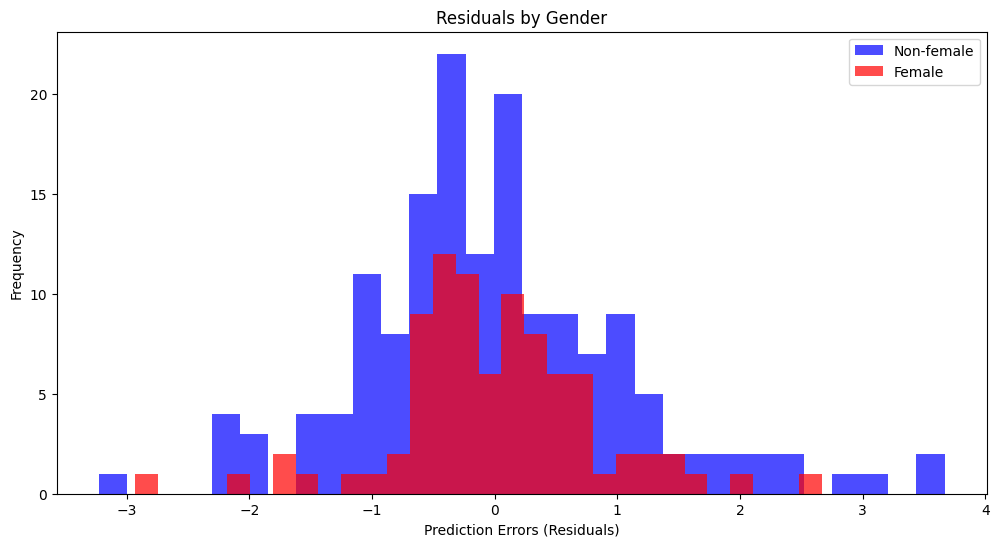

In [71]:
# Calculate prediction errors
errors = tips['tip'] - model.predict()

# Split errors by the 'is_usa' indicator
errors_female = errors[tips['is_female'] == 1]
errors_non_female = errors[tips['is_female'] == 0]

# Plot histograms for each group
plt.figure(figsize=(12, 6))

# Histogram for USA cars
plt.hist(errors_non_female, bins=30, alpha=0.7, label='Non-female', color='blue')
# Histogram for non-USA cars
plt.hist(errors_female, bins=30, alpha=0.7, label='Female', color='red')

plt.xlabel('Prediction Errors (Residuals)')
plt.ylabel('Frequency')
plt.title('Residuals by Gender')
plt.legend()
plt.show()


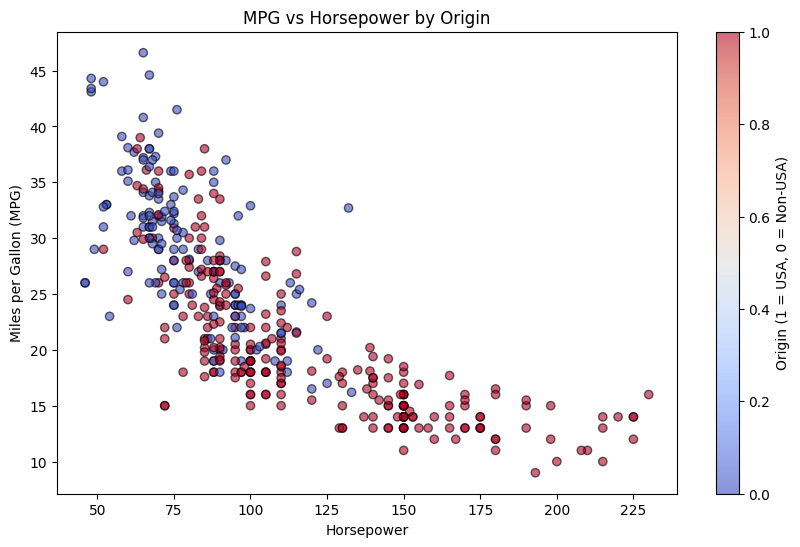

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     265.0
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.51e-93
Time:                        23:19:38   Log-Likelihood:                -1142.7
No. Observations:                 392   AIC:                             2293.
Df Residuals:                     388   BIC:                             2309.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            47.3407      1.62

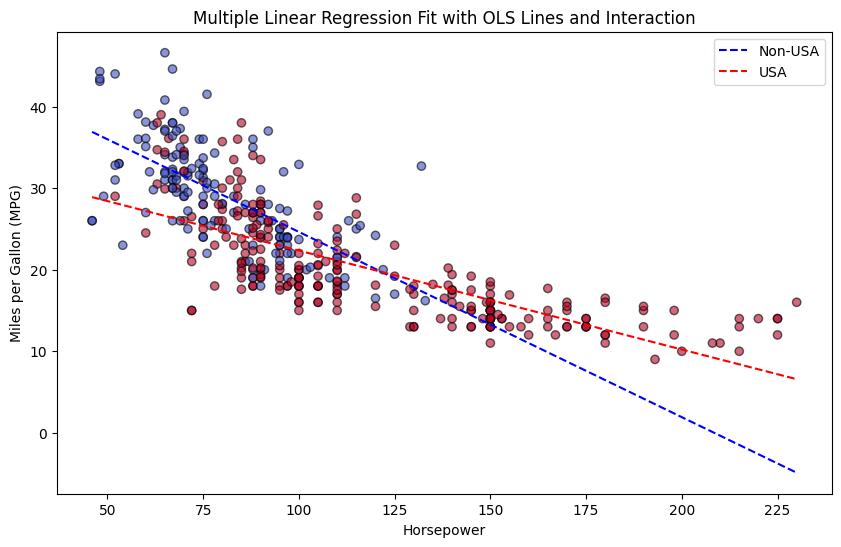

In [72]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Load the dataset
mpg = sns.load_dataset("mpg").dropna()

# Convert 'origin' into indicator (dummy) variables for USA and non-USA cars
mpg['is_usa'] = mpg['origin'].apply(lambda x: 1 if x == 'usa' else 0)

# Scatter plot of mpg vs horsepower, colored by origin
plt.figure(figsize=(10, 6))
plt.scatter(mpg['horsepower'], mpg['mpg'], c=mpg['is_usa'], cmap='coolwarm', edgecolor='k', alpha=0.6)
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')
plt.title('MPG vs Horsepower by Origin')
plt.colorbar(label='Origin (1 = USA, 0 = Non-USA)')
plt.show()

# Multiple Linear Regression with interaction term between 'is_usa' and 'horsepower'
model = smf.ols('mpg ~ is_usa * horsepower', data=mpg).fit()

# Print the model summary
print(model.summary())

# Plot the fitted lines for is_usa = 0 and is_usa = 1
plt.figure(figsize=(10, 6))
plt.scatter(mpg['horsepower'], mpg['mpg'], c=mpg['is_usa'], cmap='coolwarm', edgecolor='k', alpha=0.6)

# Define x values for drawing the OLS lines
hp_values = np.linspace(mpg['horsepower'].min(), mpg['horsepower'].max(), 100)

# Calculate the fitted line for non-USA (is_usa = 0)
predicted_mpg_non_usa = model.params['Intercept'] + model.params['horsepower'] * hp_values
plt.plot(hp_values, predicted_mpg_non_usa, label='Non-USA', color='blue', linestyle='--')

# Calculate the fitted line for USA (is_usa = 1)
predicted_mpg_usa = (
    model.params['Intercept'] 
    + model.params['is_usa'] 
    + (model.params['horsepower'] + model.params['is_usa:horsepower']) * hp_values
)
plt.plot(hp_values, predicted_mpg_usa, label='USA', color='red', linestyle='--')

plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')
plt.title('Multiple Linear Regression Fit with OLS Lines and Interaction')
plt.legend()
plt.show()


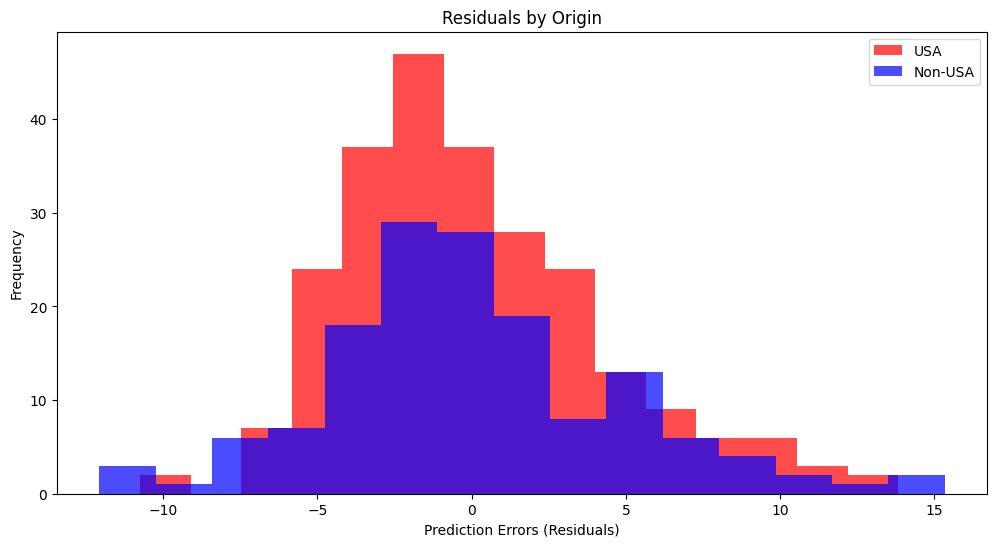

In [73]:
# Calculate prediction errors
errors = mpg['mpg'] - model.predict()

# Split errors by the 'is_usa' indicator
errors_usa = errors[mpg['is_usa'] == 1]
errors_non_usa = errors[mpg['is_usa'] == 0]

# Plot histograms for each group
plt.figure(figsize=(12, 6))

# Histogram for USA cars
plt.hist(errors_usa, bins=15, alpha=0.7, label='USA', color='red')
# Histogram for non-USA cars
plt.hist(errors_non_usa, bins=15, alpha=0.7, label='Non-USA', color='blue')

plt.xlabel('Prediction Errors (Residuals)')
plt.ylabel('Frequency')
plt.title('Residuals by Origin')
plt.legend()
plt.show()


### 2. Explain in your own words (but working with a ChatBot if needed) what the specific (outcome and predictor) variables are for the scenario below; whether or not any meaningful interactions might need to be taken into account when predicting the outcome; and provide the linear forms with and without the potential interactions that might need to be considered

Session link for Q2: https://chatgpt.com/share/672fc363-5490-8012-8d29-f1da9b3ee681

> Imagine a company that sells sports equipment. The company runs advertising campaigns on TV and online platforms. The effectiveness of the TV ad might depend on the amount spent on online advertising and vice versa, leading to an interaction effect between the two advertising mediums.

In this example, the predictor variables will be the amount's of money spent on advertising for TV and for Online platforms. The single outcome variable will the total number of sales. We can measure the interaction between sales and the TV advertising budget using the equation $Y_i = \beta_0 + \beta_1 (x_{i_{\text{television budget}}})$ and the interaction between sales and online advertising through the equation $Y_i = \beta_0 + \beta_1 (x_{i_{\text{online budget}}})$

1) Explain how to use these two formulas to make predictions of the outcome, and give a high level explanation in general terms of the difference between predictions from the models with and without the interaction  

We can use the add the two formulas together to get a general prediction of the sales outcome assuming there is no interaction between the budget of the two types of advertising: $Y_i = \beta_0 + \beta_{TV} tv_i + \beta_{ON} on_i$. Assuming there is interaction, we can modify our equations to the following $Y_i = \beta_0 + \beta_{TV} tv_i + \beta_{ON} on_i + \beta_{TV + ON} (tv_i \times on_i)$. With this model, we have another parameter which can quantify the effect of the relationship between the amount spent on tv and on

2) Explain how to update and use the implied two formulas to make predictions of the outcome if, rather than considering two continuous predictor variables, we instead suppose the advertisement budgets are simply categorized as either "high" or "low" (binary variables)

To update our model to consider the budgets as high and low instead of continuous variables, we can convert them to indicator variables, where 1 represents high budget and 0 represents low budget. $Y_i = \beta_0 + \beta_{TV} 1_{["TV"="high"]}(tv_i) + \beta_{ON} 1_{["ON"="high"]}(on_i) + \beta_{TV + ON} 1_{["TV"="high"]}(tv_i) \times 1_{["ON"="high"]}(on_i)$

Additive Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.83e-98
Time:                        23:19:38   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0

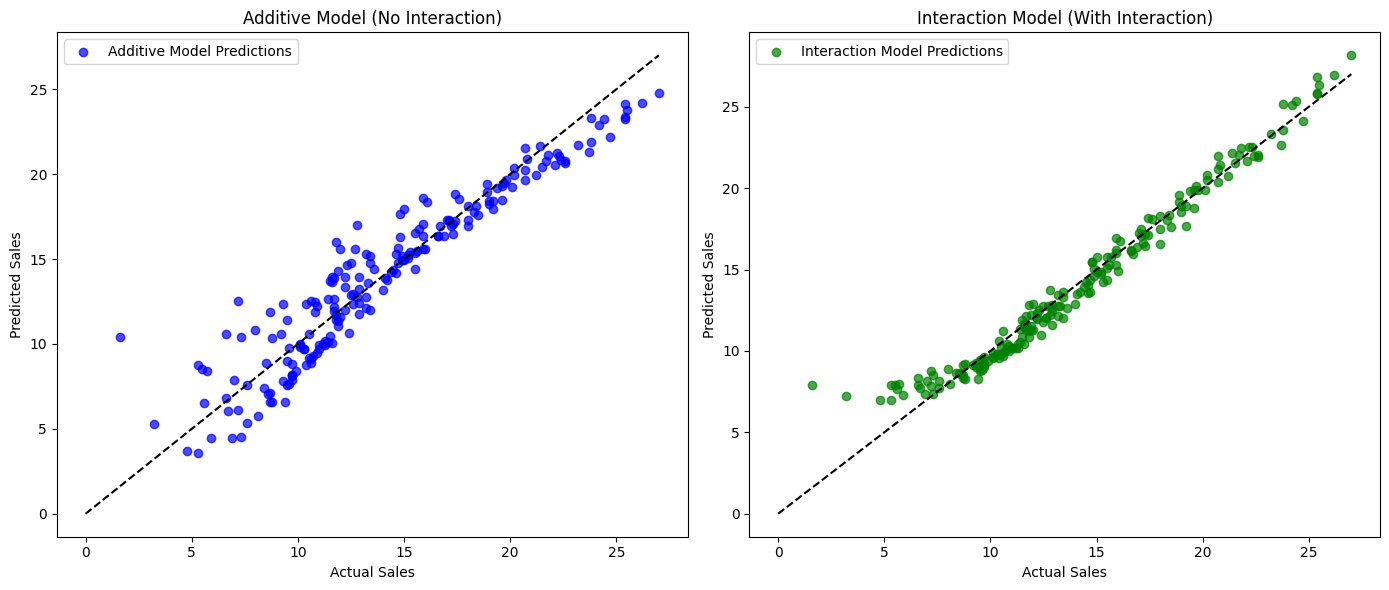

In [74]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Load the dataset (skip the unnamed index column)
df = pd.read_csv("advertising.csv")

# 1. Fit the additive model (no interaction term)
# Using smf.ols with a formula string
model_additive = smf.ols('Sales ~ TV + Radio', data=df).fit()
print("Additive Model Summary:")
print(model_additive.summary())

# 2. Fit the interaction (synergistic) model
# Including the interaction term in the formula
model_interaction = smf.ols('Sales ~ TV + Radio + TV:Radio', data=df).fit()
print("\nSynergistic Model (with Interaction) Summary:")
print(model_interaction.summary())

# 3. Predictions and plotting the results
df['additive_pred'] = model_additive.predict(df)
df['interaction_pred'] = model_interaction.predict(df)

# Scatter plot with predictions from both models
plt.figure(figsize=(14, 6))

# Scatter plot of actual vs. additive model predictions
plt.subplot(1, 2, 1)
plt.scatter(df['Sales'], df['additive_pred'], alpha=0.7, color='blue', label='Additive Model Predictions')
plt.plot([0, max(df['Sales'])], [0, max(df['Sales'])], color='black', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Additive Model (No Interaction)")
plt.legend()

# Scatter plot of actual vs. interaction model predictions
plt.subplot(1, 2, 2)
plt.scatter(df['Sales'], df['interaction_pred'], alpha=0.7, color='green', label='Interaction Model Predictions')
plt.plot([0, max(df['Sales'])], [0, max(df['Sales'])], color='black', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Interaction Model (With Interaction)")
plt.legend()

plt.tight_layout()
plt.show()


In [75]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.graph_objs as go
import numpy as np

# Load the dataset (skip the unnamed index column)
df = pd.read_csv("Advertising.csv")

# 1. Fit the additive model (no interaction term)
model_additive = smf.ols('Sales ~ TV + Radio', data=df).fit()

# 2. Fit the interaction (synergistic) model
model_interaction = smf.ols('Sales ~ TV + Radio + TV:Radio', data=df).fit()

# 3. Generate a grid of values for TV and Radio to predict Sales over a surface
tv_range = np.linspace(df['TV'].min(), df['TV'].max(), 50)
radio_range = np.linspace(df['Radio'].min(), df['Radio'].max(), 50)
TV, Radio = np.meshgrid(tv_range, radio_range)
grid = pd.DataFrame({'TV': TV.ravel(), 'Radio': Radio.ravel()})

# Predict Sales for each model on this grid
grid['additive_pred'] = model_additive.predict(grid)
grid['interaction_pred'] = model_interaction.predict(grid)

# Reshape predictions to match the shape of the TV and Radio grid
Additive_Sales = grid['additive_pred'].values.reshape(TV.shape)
Interaction_Sales = grid['interaction_pred'].values.reshape(TV.shape)

# 4. Create interactive 3D plot with Plotly
fig = go.Figure()

# Add scatter plot for actual data points
fig.add_trace(go.Scatter3d(
    x=df['TV'], y=df['Radio'], z=df['Sales'],
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.7),
    name='Actual Sales'
))

# Add surface for the Additive Model
fig.add_trace(go.Surface(
    x=tv_range, y=radio_range, z=Additive_Sales,
    colorscale='Blues', opacity=0.5,
    name='Additive Model'
))

# Add surface for the Interaction Model
fig.add_trace(go.Surface(
    x=tv_range, y=radio_range, z=Interaction_Sales,
    colorscale='Greens', opacity=0.5,
    name='Interaction Model'
))

# Update layout for better visualization
fig.update_layout(
    title="3D Interactive Plot of Sales Predictions",
    scene=dict(
        xaxis_title="TV",
        yaxis_title="Radio",
        zaxis_title="Sales"
    ),
    legend=dict(x=0, y=1),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


Additive Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.83e-98
Time:                        23:19:39   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0

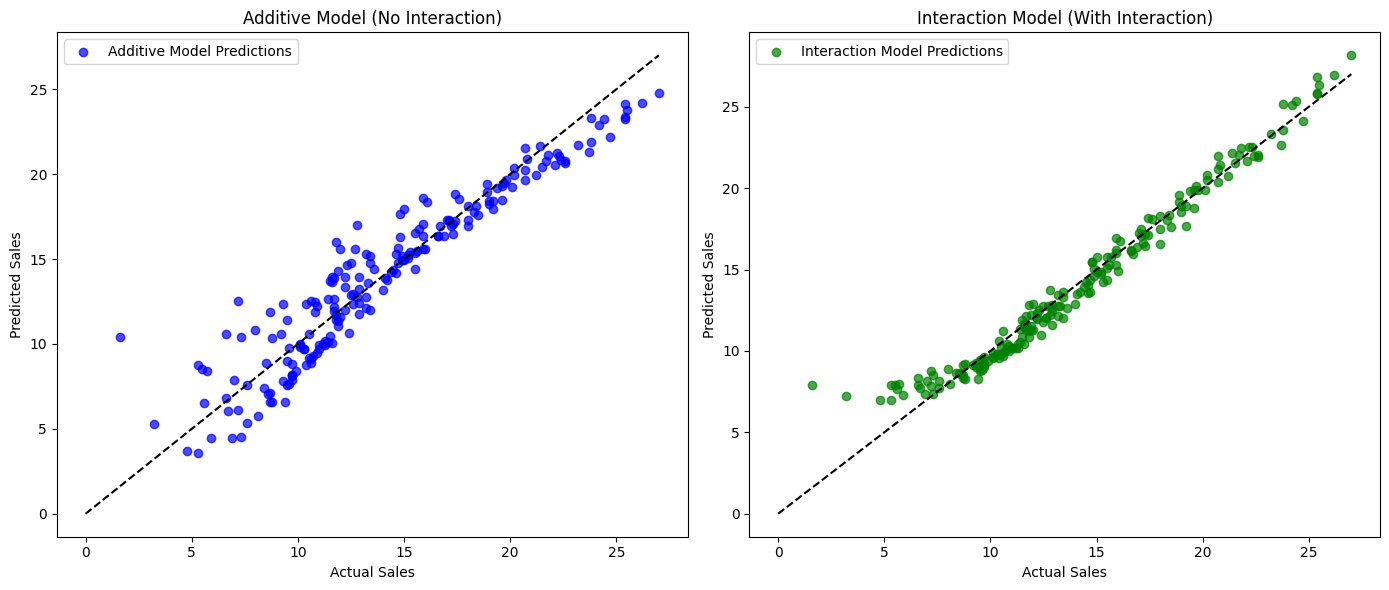

In [76]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Load the dataset (skip the unnamed index column)
df = pd.read_csv("advertising.csv")

# 1. Fit the additive model (no interaction term)
# Using smf.ols with a formula string
model_additive = smf.ols('Sales ~ TV + Radio', data=df).fit()
print("Additive Model Summary:")
print(model_additive.summary())

# 2. Fit the interaction (synergistic) model
# Including the interaction term in the formula
model_interaction = smf.ols('Sales ~ TV + Radio + TV:Radio', data=df).fit()
print("\nSynergistic Model (with Interaction) Summary:")
print(model_interaction.summary())

# 3. Predictions and plotting the results
df['additive_pred'] = model_additive.predict(df)
df['interaction_pred'] = model_interaction.predict(df)

# Scatter plot with predictions from both models
plt.figure(figsize=(14, 6))

# Scatter plot of actual vs. additive model predictions
plt.subplot(1, 2, 1)
plt.scatter(df['Sales'], df['additive_pred'], alpha=0.7, color='blue', label='Additive Model Predictions')
plt.plot([0, max(df['Sales'])], [0, max(df['Sales'])], color='black', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Additive Model (No Interaction)")
plt.legend()

# Scatter plot of actual vs. interaction model predictions
plt.subplot(1, 2, 2)
plt.scatter(df['Sales'], df['interaction_pred'], alpha=0.7, color='green', label='Interaction Model Predictions')
plt.plot([0, max(df['Sales'])], [0, max(df['Sales'])], color='black', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Interaction Model (With Interaction)")
plt.legend()

plt.tight_layout()
plt.show()


### 3. Use smf to fit multiple linear regression models to the course project dataset from the canadian social connection survey
EDIT: No, you probably actually care about CATEGORICAL or BINARY outcomes rather than CONTINUOUS outcomes... so you'll probably not actually want to do multiple linear regression and instead do logistic regression or multi-class classification. Okay, I'll INSTEAD guide you through doing logistic regression.

for an additive specification for the linear form based on any combination of a couple continuous, binary, and/or categorical variables and a CONTINUOUS OUTCOME varaible
This would have been easy to do following the instructions here. A good alternative analagous presentation for logistic regression I just found seems to be this one from a guy named Andrew. He walks you through the logit alternative to OLS given here.
Logistic is for a binary outcome so go see this piazza post describing how you can turn any non-binary categorical variable into a binary variable.
Then instead do this problem like this: catogorical outcome turned into a binary outcome for logistic regression and then use any additive combination of a couple of continuous, binary, and/or categorical variables as predictor variables.
##### Here's an example of how you can do this

In [77]:
import pandas as pd
import statsmodels.formula.api as smf

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url).fillna('None')

pokeaman['str8fyre'] = (pokeaman['Type 1']=='Fire').astype(int)
linear_model_specification_formula = \
'str8fyre ~ Attack*Legendary + Defense*I(Q("Type 2")=="None") + C(Generation)'
log_reg_fit = smf.logit(linear_model_specification_formula, data=pokeaman).fit()
log_reg_fit.summary()


Optimization terminated successfully.
         Current function value: 0.228109
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               str8fyre   No. Observations:                  800
Model:                          Logit   Df Residuals:                      788
Method:                           MLE   Df Model:                           11
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                 0.05156
Time:                        23:19:40   Log-Likelihood:                -182.49
converged:                       True   LL-Null:                       -192.41
Covariance Type:            nonrobust   LLR p-value:                   0.04757
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -3.2644      0.714     -4.572      0.000      -4.664      -1.865
Legendary[T.True]                            4.3478      2.179      1.996      0.046       0.078       8.618
I(Q("Type 2") == "None")[T.True]             1.5432      0.853      1.810      0.070      -0.128       3.215
C(Generation)[T.2]                          -0.0574      0.468     -0.123      0.902      -0.975       0.861
C(Generation)[T.3]                          -0.6480      0.466     -1.390      0.164      -1.561       0.265
C(Generation)[T.4]                          -0.8255      0.545     -1.516      0.130      -1.893       0.242
C(Generation)[T.5]                          -0.5375      0.449     -1.198      0.231      -1.417       0.342
C(Generation)[T.6]                           0.3213      0.477      0.673      0.501      -0.614       1.257
Attack                                       0.0172      0.006      3.086      0.002       0.006       0.028
Attack:Legendary[T.True]                    -0.0365      0.019     -1.884      0.060      -0.074       0.001
Defense                                     -0.0098      0.008     -1.247      0.213      -0.025       0.006
Defense:I(Q("Type 2") == "None")[T.True]    -0.0197      0.012     -1.651      0.099      -0.043       0.004
============================================================================================================
"""


for a synertistic interaction specification for the linear form based on any combination of a couple continuous, binary, and/or categorical variables

But go ahead and AGAIN do this for logistic regression like above.
Things are going to be A LOT simpler if you restrict yourself to continuous and/or binary predictor variables. But of course you could use the same trick again to treat any categorical variable as just a binary variable (in the manner of that piazza post.
and interpretively explain your linear forms and how to use them to make predictions

Look, intereting logistic regression IS NOT as simple as interpreting multivariate linear regression. This is because it requires you to understand so-called log odds and that's a bit tricky.
So, INSTEAD, just intepret you logistic regression models AS IF they were multivariate linear regression model predictions, okay?
and interpret the statistical evidence associated with the predictor variables for each of your model specifications

Yeah, you're going to be able to do this based on the .fit().summary() table just like with multiple linear regression... now you might be starting to see how AWESOME all of this stuff we're doing is going to be able to get...
and finally use plotly to visualize the data with corresponding "best fit lines" for a model with continuous plus binary indicator specification under both (a) additive and (b) synergistic specifications of the linear form (on separate figures), commenting on the apparent necessity (or lack thereof) of the interaction term for the data in question

Aw, shit, you DEF not going to be able to do this if you're doing logistic regression because of that log odds thing I mentioned... hmm...
OKAY! Just pretend it's multivariate linear regression (even if you're doing logistic regression) and pretend your fitted coefficients belong to a continuous and a binary predictor variable; then, draw the lines as requested, and simulate random noise for the values of your predictor data and plot your lines along with that data.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



C:\Users\Cayden Wong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



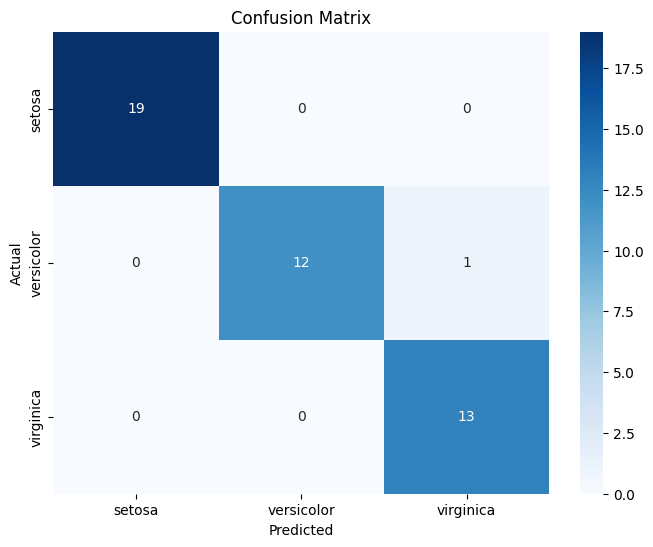

C:\Users\Cayden Wong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



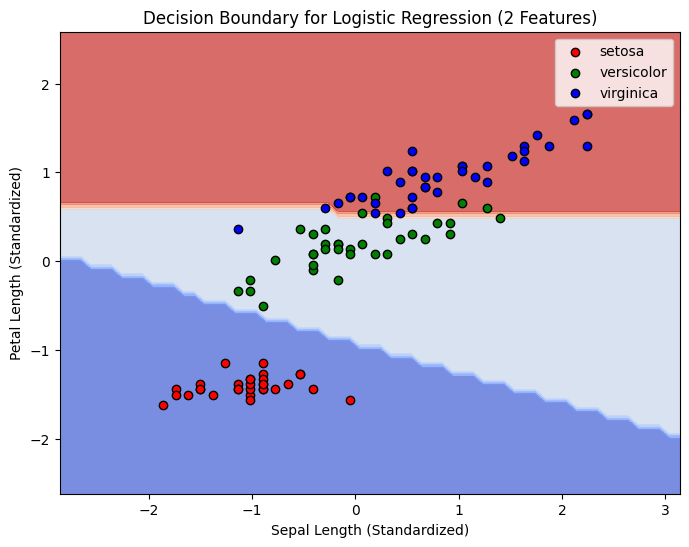

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Load and prepare the data
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']]
y = data.target  # Target labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit multinomial logistic regression with regularization
model = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 1. Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Plot Decision Boundaries (using only two features for simplicity)
# Select two features for visualization
X_vis = df[['sepal length (cm)', 'petal length (cm)']]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_vis)
X_test_scaled = scaler.transform(X_test_vis)

# Fit the logistic regression model
model_vis = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
model_vis.fit(X_train_scaled, y_train_vis)

# Create mesh grid for plotting decision boundaries
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict class labels on the grid
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')

# Plot training points with class labels
colors = ['red', 'green', 'blue']
for i, color in zip(range(len(data.target_names)), colors):
    idx = np.where(y_train_vis == i)
    plt.scatter(X_train_scaled[idx, 0], X_train_scaled[idx, 1], c=color, edgecolor='k', label=data.target_names[i], marker='o')

plt.title('Decision Boundary for Logistic Regression (2 Features)')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Petal Length (Standardized)')
plt.legend()
plt.show()


In [79]:
import numpy as np
import pandas as pd

# Create synthetic test data based on the range of the Iris dataset
np.random.seed(42)

# Number of test samples
n_samples = 10

# Generate random data for the features (approximate the Iris dataset feature ranges)
sepal_length = np.random.uniform(4.3, 7.9, n_samples)  # Range of sepal_length in Iris dataset
sepal_width = np.random.uniform(2.0, 4.4, n_samples)   # Range of sepal_width
petal_length = np.random.uniform(1.0, 6.9, n_samples)  # Range of petal_length
petal_width = np.random.uniform(0.1, 2.5, n_samples)   # Range of petal_width

# Generate random species (0, 1, or 2) for classification
species = np.random.choice([0, 1, 2], size=n_samples)

# Create a DataFrame
test_data = pd.DataFrame({
    'sepal_length': sepal_length,
    'sepal_width': sepal_width,
    'petal_length': petal_length,
    'petal_width': petal_width,
    'species': species
})

# Display the synthetic test data
print(test_data)


   sepal_length  sepal_width  petal_length  petal_width  species
0      5.648344     2.049403      4.609932     1.558108        2
1      7.722572     4.327784      1.823014     0.509258        0
2      6.935178     3.997862      2.723653     0.256124        2
3      6.455171     2.509614      3.161535     2.377325        2
4      4.861667     2.436380      3.690813     2.417517        1
5      4.861580     2.440171      5.632538     2.040154        0
6      4.509101     2.730181      2.178075     0.831073        1
7      7.418234     3.259415      4.033983     0.334413        1
8      6.464014     3.036668      4.495246     1.742159        1
9      6.849061     2.698950      1.274057     1.156366        1


Synthetic test data:
    sepal_length  sepal_width  petal_length  petal_width  species
0      5.648344     2.049403      4.609932     1.558108        2
1      7.722572     4.327784      1.823014     0.509258        0
2      6.935178     3.997862      2.723653     0.256124        2
3      6.455171     2.509614      3.161535     2.377325        2
4      4.861667     2.436380      3.690813     2.417517        1
5      4.861580     2.440171      5.632538     2.040154        0
6      4.509101     2.730181      2.178075     0.831073        1
7      7.418234     3.259415      4.033983     0.334413        1
8      6.464014     3.036668      4.495246     1.742159        1
9      6.849061     2.698950      1.274057     1.156366        1
         Current function value: 0.039662
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                species   No. Observations:                  150
Model:                        MNLogit  

C:\Users\Cayden Wong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Cayden Wong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



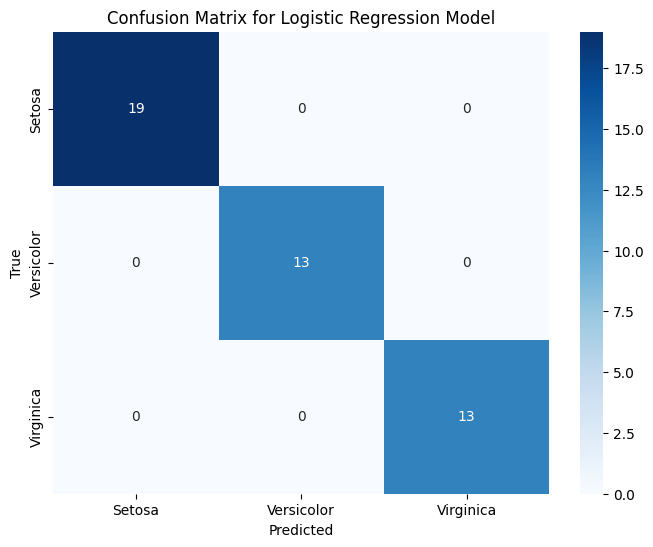


Feature Importance (Coefficients) from Logistic Regression Model:
        Feature  Coefficient
1   sepal_width     1.051428
0  sepal_length    -0.980389
3   petal_width    -1.604326
2  petal_length    -1.747783


In [80]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset (assuming it's in the same structure as Iris dataset)
# Creating synthetic data
np.random.seed(42)

# Number of test samples
n_samples = 10


# Generate random data for the features (approximate the Iris dataset feature ranges)
sepal_length = np.random.uniform(4.3, 7.9, n_samples)
sepal_width = np.random.uniform(2.0, 4.4, n_samples)
petal_length = np.random.uniform(1.0, 6.9, n_samples)
petal_width = np.random.uniform(0.1, 2.5, n_samples)

# Generate random species (0, 1, or 2) for classification
species = np.random.choice([0, 1, 2], size=n_samples)

# Create a DataFrame
test_data = pd.DataFrame({
    'sepal_length': sepal_length,
    'sepal_width': sepal_width,
    'petal_length': petal_length,
    'petal_width': petal_width,
    'species': species
})

# Display the synthetic test data
print("Synthetic test data:\n", test_data)

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Keep the numeric labels for species

# Mapping target values to categorical labels (optional for display purposes)
df['species_label'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


# Step 2: Train a multinomial logistic regression model using statsmodels
# Assuming your dataset has already been preprocessed
# df = pd.read_csv('iris.csv')  # Replace with actual dataset path if needed
df.rename(columns={
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'
}, inplace=True)


from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(
    df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)

# Re-fit the model with the standardized features
model = smf.mnlogit('species ~ sepal_length + sepal_width + petal_length + petal_width', data=df)
result = model.fit()
print(result.summary())

# Fit the multinomial logistic regression model
# model = smf.mnlogit('species ~ sepal_length + sepal_width + petal_length + petal_width', data=df)

# # Train the model
# result = model.fit()

# # Print summary of the model
# print(result.summary())

# Step 3: Model Evaluation
# Create a LogisticRegression model for classification prediction

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg.fit(X_train, y_train)

# Step 4: Evaluate the model on the test set
y_pred = log_reg.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Step 5: Predicting on the synthetic test data
test_X = test_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
test_y_pred = log_reg.predict(test_X)

# Display the predictions for the synthetic test data
test_data['predicted_species'] = test_y_pred
print("\nPredictions on Synthetic Test Data:")
print(test_data)

# Step 6: Visualization of Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 7: Displaying feature importance from Logistic Regression model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance (Coefficients) from Logistic Regression Model:")
print(feature_importance)


### 4. Explain the apparent contradiction between the factual statements regarding the fit below that "the model only explains 17.6% of the variability in the data" while at the same time "many of the coefficients are larger than 10 while having strong or very strong evidence against the null hypothesis of 'no effect'"

Session link for Q4: https://chatgpt.com/share/67364201-02b0-8012-87a7-eda3ae815cfe

In [81]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [82]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        23:19:42   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

While our calculated $R^2$ value is low (around 17%), this is not a contradiction with our observed low p-values. This is because fundamentally, $R^2$ captures the amount of variance explained by the model, whereas a low p-value indicates significant evidence against the null hypothesis that some factor has "no effect". When we have a low $R^2$ and low p-values, this simply means that the individual coefficient are statistically significant, BUT they do not capture ALL of the variance within the population (small effect but with high precision). There are other more dominant factors that were not included in the model that can explain away some of the additional variance. 

### 5. Discuss the following (five cells of) code and results with a ChatBot and based on the understanding you arrive at in this conversation explain what the following (five cells of) are illustrating

Session link for Q5: https://chatgpt.com/share/6736b488-ca1c-8012-b1b4-bee60f5f32df

In [83]:
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import pandas as pd


url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                    data=pokeaman)
model3_fit = model_spec3.fit()

# splits data into exactly half
# np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
# pokeaman_train
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     88.70
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.65e-35
Time:                        23:19:42   Log-Likelihood:                -3646.3
No. Observations:                 800   AIC:                             7299.
Df Residuals:                     797   BIC:                             7313.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.7733      2.456     16.599      0.000      35.952      45.595
Attack         0.3091      0.028     11.021      0.000       0.254       0.364
Defense        0.0551      0.029      1.887      0.060      -0.002       0.112
==============================================================================
Omnibus:                      547.586   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12418.901
Skew:                           2.755   Prob(JB):                         0.00
Kurtosis:                      21.499   Cond. No.                         345.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
bootstrap_amount = 1000
in_sample_r_squared = np.zeros(bootstrap_amount)
out_sample_r_squared = np.zeros(bootstrap_amount)
diff_r_squared = np.zeros(bootstrap_amount)

pokeaman_train,pokeaman_test = \
train_test_split(pokeaman, train_size=fifty_fifty_split_size)

model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                    data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()
# trains a model on the training data

yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print(f"{model3_fit.rsquared = } \
      \n{np.corrcoef(y,yhat_model3)[0,1]**2 = },\
      \n{model3_fit.rsquared - np.corrcoef(y,yhat_model3)[0,1]**2 = }")

for i in range(bootstrap_amount):
    pokeaman_train,pokeaman_test = \
    train_test_split(pokeaman, train_size=fifty_fifty_split_size)

    model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                        data=pokeaman_train)
    model3_fit = model_spec3.fit()
    model3_fit.summary()
    # trains a model on the training data

    yhat_model3 = model3_fit.predict(pokeaman_test)
    y = pokeaman_test.HP
    in_sample_r_squared[i] = model3_fit.rsquared
    out_sample_r_squared[i] = np.corrcoef(y,yhat_model3)[0,1]**2
    # print(f"{model3_fit.rsquared} : {np.corrcoef(y,yhat_model3)[0,1]**2}")
    diff_r_squared[i] = out_sample_r_squared[i] - in_sample_r_squared[i]
print("'In sample average ' R-squared:    ", in_sample_r_squared.mean())
print("'Out of sample average' R-squared:", out_sample_r_squared.mean())
print("Average diff in R-squared:", diff_r_squared.mean())

model3_fit.rsquared = 0.25864098760185905       
np.corrcoef(y,yhat_model3)[0,1]**2 = 0.1320387529064299,      
model3_fit.rsquared - np.corrcoef(y,yhat_model3)[0,1]**2 = 0.12660223469542914
'In sample average ' R-squared:     0.18703353942327852
'Out of sample average' R-squared: 0.18662162996720763
Average diff in R-squared: -0.00041190945607087704


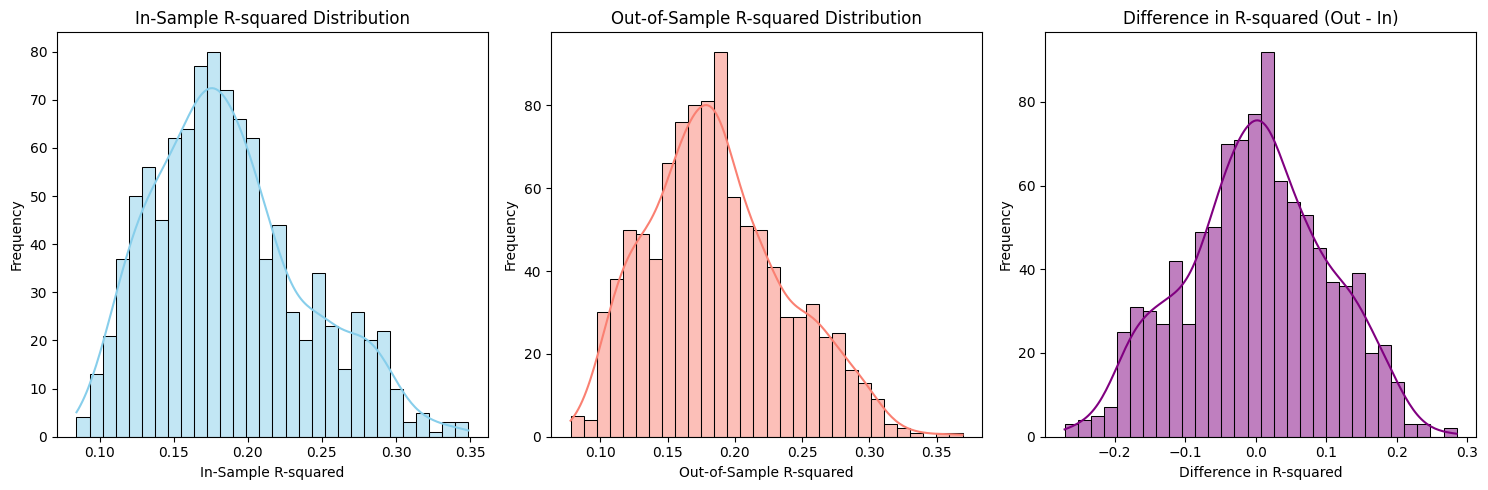

C:\Users\Cayden Wong\AppData\Local\Temp\ipykernel_2440\3835555361.py:34: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Cayden Wong\AppData\Local\Temp\ipykernel_2440\3835555361.py:35: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




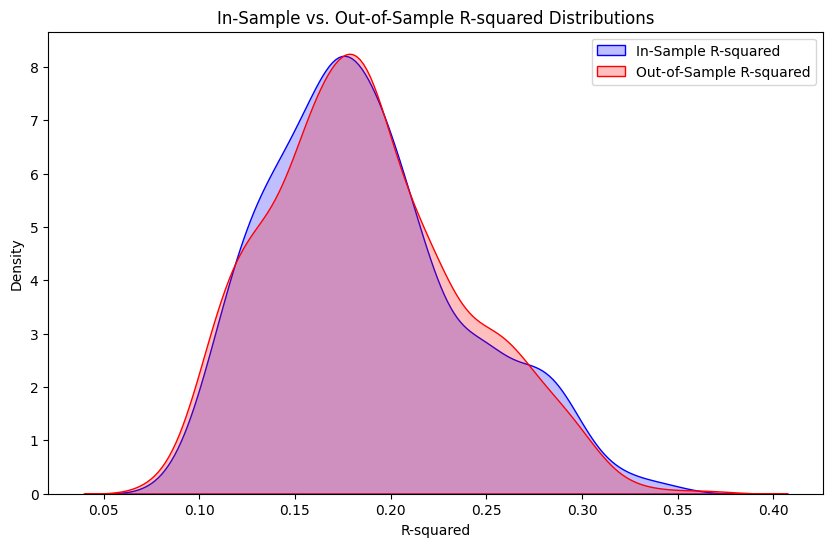

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(15, 5))

# Histogram for in-sample R-squared
plt.subplot(1, 3, 1)
sns.histplot(in_sample_r_squared, kde=True, color="skyblue", bins=30)
plt.title("In-Sample R-squared Distribution")
plt.xlabel("In-Sample R-squared")
plt.ylabel("Frequency")

# Histogram for out-of-sample R-squared
plt.subplot(1, 3, 2)
sns.histplot(out_sample_r_squared, kde=True, color="salmon", bins=30)
plt.title("Out-of-Sample R-squared Distribution")
plt.xlabel("Out-of-Sample R-squared")
plt.ylabel("Frequency")

# Histogram for the difference in R-squared
plt.subplot(1, 3, 3)
sns.histplot(diff_r_squared, kde=True, color="purple", bins=30)
plt.title("Difference in R-squared (Out - In)")
plt.xlabel("Difference in R-squared")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

# Plot KDE for in-sample and out-of-sample R-squared values
sns.kdeplot(in_sample_r_squared, color="blue", label="In-Sample R-squared", shade=True)
sns.kdeplot(out_sample_r_squared, color="red", label="Out-of-Sample R-squared", shade=True)

# Add titles and labels
plt.title("In-Sample vs. Out-of-Sample R-squared Distributions")
plt.xlabel("R-squared")
plt.ylabel("Density")
plt.legend()

plt.show()

In [86]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     3.869
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           7.26e-16
Time:                        23:19:51   Log-Likelihood:                -1743.3
No. Observations:                 400   AIC:                             3613.
Df Residuals:                     337   BIC:                             3864.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          316.4099     83.785      3.776      0.000     151.602     481.218
Legendary[T.True]                                                -3.081e+04   2.58e+04     -1.195      0.233   -8.15e+04    1.99e+04
Attack                                                              -5.7973      1.882     -3.081      0.002      -9.499      -2.096
Attack:Legendary[T.True]                                           225.6691    296.204      0.762      0.447    -356.972     808.310
Defense                                                             -2.4835      1.213     -2.047      0.041      -4.870      -0.097
Defense:Legendary[T.True]                                          325.2143    264.880      1.228      0.220    -195.812     846.240
Attack:Defense                                                       0.0519      0.021      2.492      0.013       0.011       0.093
Attack:Defense:Legendary[T.True]                                    -2.2139      2.658     -0.833      0.405      -7.442       3.015
Speed                                                               -4.8523      1.458     -3.329      0.001      -7.720      -1.985
Speed:Legendary[T.True]                                            263.3158    302.586      0.870      0.385    -331.880     858.511
Attack:Speed                                                         0.0837      0.029      2.896      0.004       0.027       0.141
Attack:Speed:Legendary[T.True]                                      -1.8448      3.705     -0.498      0.619      -9.134       5.444
Defense:Speed                                                        0.0501      0.024      2.114      0.035       0.003       0.097
Defense:Speed:Legendary[T.True]                                     -2.8179      2.764     -1.019      0.309      -8.255       2.619
Attack:Defense:Speed                                                -0.0008      0.000     -2.249      0.025      -0.001   -9.92e-05
Attack:Defense:Speed:Legendary[T.True]                               0.0175      0.035      0.504      0.615      -0.051       0.086
Q("Sp. Def")                                                        -2.6498      1.297     -2.043      0.042      -5.202      -0.098
Legendary[T.True]:Q("Sp. Def")                                     184.3168    213.041      0.865      0.388    -234.740     603.373
Attack:Q("Sp. Def")                                                  0.0728      0.027      2.682      0.008       0.019       0.126
Attack:Legendary[T.True]:Q("Sp. Def")                               -1.0810      2.390     -0.452      0.651      -5.783       3.621
Defense:Q("Sp. Def")    

In [87]:
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import pandas as pd

# Define bootstrap parameters
bootstrap_amount = 1000
in_sample_r_squared = np.zeros(bootstrap_amount)
out_sample_r_squared = np.zeros(bootstrap_amount)
diff_r_squared = np.zeros(bootstrap_amount)

# Define the formula
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'

# Bootstrap loop
for i in range(bootstrap_amount):
    # Split data into train and test sets
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=fifty_fifty_split_size)
    
    # Fit the model on the training data
    model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
    model4_fit = model4_spec.fit()

    # Predict on test set
    yhat_model4 = model4_fit.predict(pokeaman_test)
    y = pokeaman_test.HP
    
    # Calculate R-squared values
    in_sample_r_squared[i] = model4_fit.rsquared
    out_sample_r_squared[i] = np.corrcoef(y, yhat_model4)[0, 1] ** 2
    diff_r_squared[i] = out_sample_r_squared[i] - in_sample_r_squared[i]

# Print average R-squared results
print("'In sample average' R-squared:    ", in_sample_r_squared.mean())
print("'Out of sample average' R-squared:", out_sample_r_squared.mean())
print("Average diff in R-squared:", diff_r_squared.mean())


'In sample average' R-squared:     0.5077755429410913
'Out of sample average' R-squared: 0.010016117678134267
Average diff in R-squared: -0.4977594252629571


C:\Users\Cayden Wong\AppData\Local\Temp\ipykernel_2440\3966507649.py:23: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Cayden Wong\AppData\Local\Temp\ipykernel_2440\3966507649.py:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




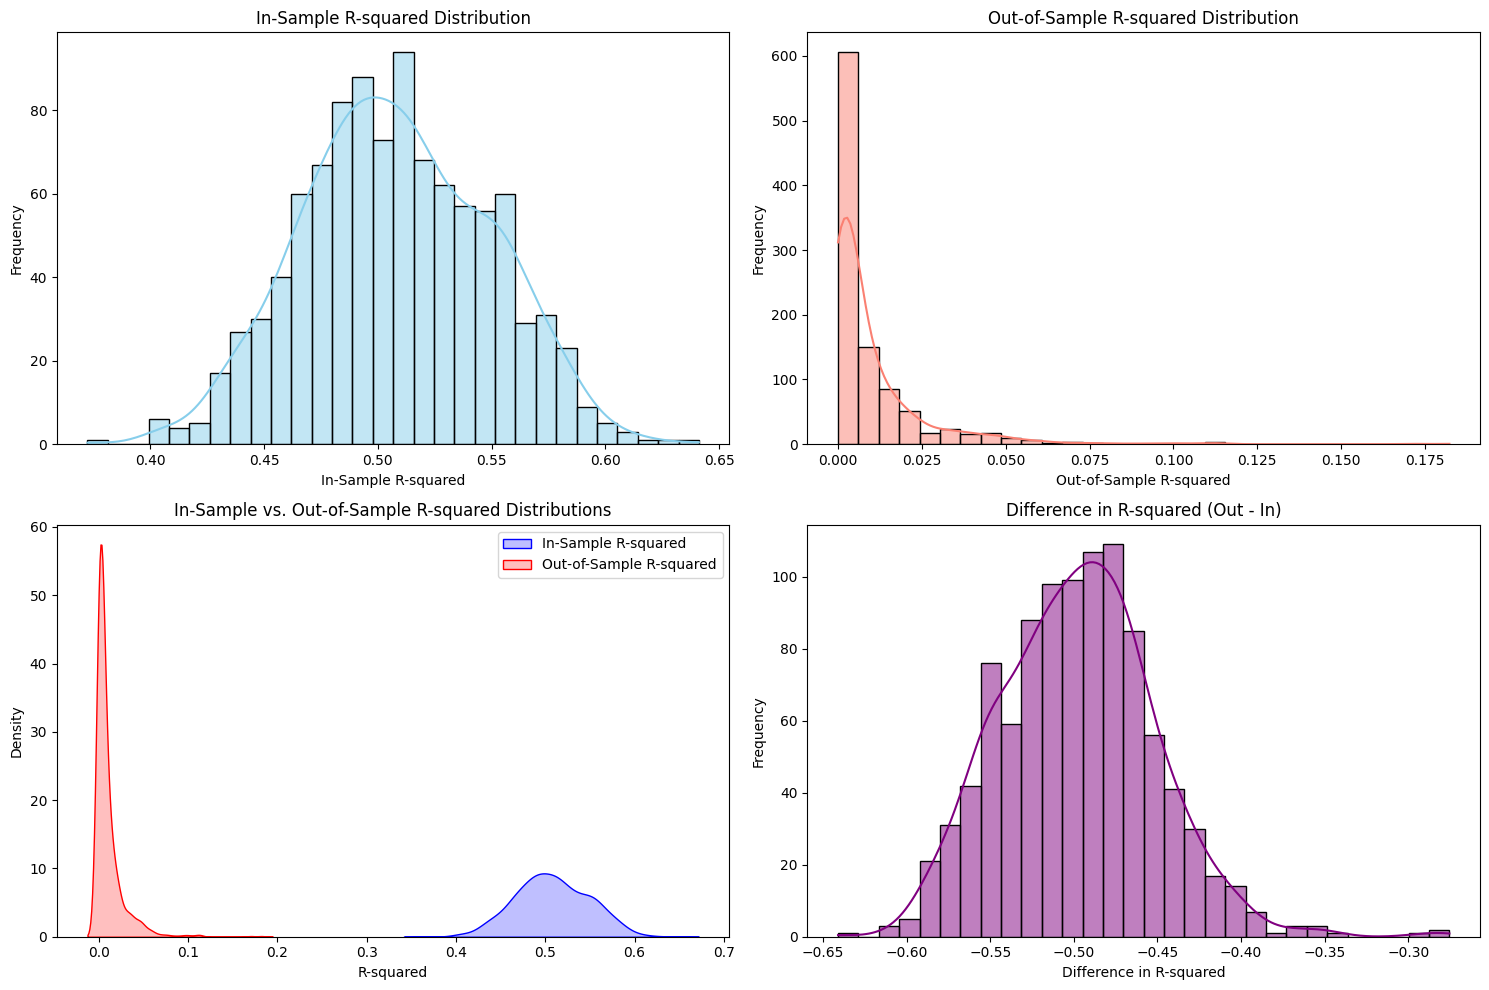

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(15, 10))

# Plot 1: Histogram for in-sample R-squared
plt.subplot(2, 2, 1)
sns.histplot(in_sample_r_squared, kde=True, color="skyblue", bins=30)
plt.title("In-Sample R-squared Distribution")
plt.xlabel("In-Sample R-squared")
plt.ylabel("Frequency")

# Plot 2: Histogram for out-of-sample R-squared
plt.subplot(2, 2, 2)
sns.histplot(out_sample_r_squared, kde=True, color="salmon", bins=30)
plt.title("Out-of-Sample R-squared Distribution")
plt.xlabel("Out-of-Sample R-squared")
plt.ylabel("Frequency")

# Plot 3: Overlay plot of in-sample vs. out-of-sample R-squared
plt.subplot(2, 2, 3)
sns.kdeplot(in_sample_r_squared, color="blue", label="In-Sample R-squared", shade=True)
sns.kdeplot(out_sample_r_squared, color="red", label="Out-of-Sample R-squared", shade=True)
plt.title("In-Sample vs. Out-of-Sample R-squared Distributions")
plt.xlabel("R-squared")
plt.ylabel("Density")
plt.legend()

# Plot 4: Histogram for difference in R-squared
plt.subplot(2, 2, 4)
sns.histplot(diff_r_squared, kde=True, color="purple", bins=30)
plt.title("Difference in R-squared (Out - In)")
plt.xlabel("Difference in R-squared")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


The code in the 5 cells given in the original homework take the pokemon dataset and split the data into two groups. Then the code trains two models based on the data in one "training" group and uses the model to try to predict hp values in the second "testing" group. The code then compares the two r squared values to compare how much the two models actually fit the data and determine whether or not the models are overfitting to the training data. In the first model comparing the relationship between attack and defense with hp, the model on average had the same r squared value between the training and testing group. The second model however, which attempted to model many interactions had a very high r squared value for the training group but very low r squared for the testing group. This suggests the model is highly overfitted to the training data and does not accurately model the pokemon population.

##### Interaction summary for Q5
Here’s a summary of our entire interaction:

1. **Initial Model Explanation**: We began by examining a code snippet that created a linear model to predict the `HP` variable in the Pokémon dataset based on `Attack` and `Defense` attributes. Using the `statsmodels` library, the code fitted an Ordinary Least Squares (OLS) regression model and displayed a summary of the fit, which included important statistics such as coefficients, R-squared, and p-values.

2. **R-squared Analysis**: Next, you used in-sample and out-of-sample R-squared values to assess model performance. In-sample R-squared measures the model's fit on the training data, while out-of-sample R-squared evaluates its generalization to unseen data. We discussed that a low in-sample but high out-of-sample R-squared could suggest the model has better predictive accuracy on new data than expected from training data, though this result is uncommon and could indicate high variance in sample selections.

3. **Bootstrap Simulation of R-squared Values**: You then implemented bootstrapping to repeatedly fit the model on different train-test splits and calculate R-squared values for both in-sample and out-of-sample data across 1000 samples. This allowed for the collection of R-squared distributions and the difference between in-sample and out-of-sample values, providing a more robust view of model performance and stability.

4. **Enhanced Model with Interaction Terms**: We modified the code to introduce a more complex model (`model4_linear_form`) with multiple interaction terms, involving attributes like `Attack`, `Defense`, `Speed`, `Legendary`, `Sp. Def`, and `Sp. Atk`. This model excluded some categorical variables (`Generation`, `Type 1`, and `Type 2`) to avoid an explosion of interaction combinations. The bootstrapping approach was then adapted to this more complex model, following the same methodology to capture in-sample and out-of-sample R-squared values.

5. **Visualization of Bootstrapped R-squared Values**: Finally, we developed visualizations to better understand the results of the bootstrapping. This included:
   - Histograms for the in-sample and out-of-sample R-squared distributions.
   - An overlay plot to compare in-sample and out-of-sample R-squared values directly.
   - A histogram showing the distribution of the difference between out-of-sample and in-sample R-squared values, providing insight into how much the model's performance varies when generalized to new data.

This analysis and visualization strategy allowed for an in-depth assessment of model performance across varying samples, highlighting both the predictive power and generalization capacity of different model specifications on the Pokémon dataset.

### 6. Work with a ChatBot to understand how the model4_linear_form (linear form specification of model4) creates new predictor variables as the columns of the so-called "design matrix" model4_spec.exog (model4_spec.exog.shape) used to predict the outcome variable model4_spec.endog and why the so-called multicollinearity in this "design matrix" (observed in np.corrcoef(model4_spec.exog)) contribues to the lack of "out of sample" generalization of predictions from model4_fit; then, explain this consisely in your own works

Session link for Q6: https://chatgpt.com/share/6736ba70-9a0c-8012-8963-43f01022be3d

In [89]:
# "Cond. No." WAS 343.0 WITHOUT to centering and scaling
model3_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     46.74
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           5.90e-19
Time:                        23:20:29   Log-Likelihood:                -1808.6
No. Observations:                 400   AIC:                             3623.
Df Residuals:                     397   BIC:                             3635.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.3714      3.423     12.086      0.000      34.642      48.101
Attack         0.3209      0.037      8.569      0.000       0.247       0.394
Defense        0.0293      0.038      0.774      0.439      -0.045       0.104
==============================================================================
Omnibus:                      153.525   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.560
Skew:                           1.615   Prob(JB):                    8.34e-155
Kurtosis:                       8.669   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     46.82
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           5.54e-19
Time:                        23:20:30   Log-Likelihood:                -1827.2
No. Observations:                 400   AIC:                             3660.
Df Residuals:                     397   BIC:                             3672.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 69.1625      1.170     59.114      0.000      66.862      71.463
scale(center(Attack))     11.1850      1.343      8.328      0.000       8.545      13.825
scale(center(Defense))     0.2732      1.343      0.203      0.839      -2.367       2.914
==============================================================================
Omnibus:                      267.426   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5114.129
Skew:                           2.513   Prob(JB):                         0.00
Kurtosis:                      19.781   Cond. No.                         1.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000

# The condition number is still bad even after centering and scaling

Omnibus:,157.542,Durbin-Watson:,1.926
Prob(Omnibus):,0.000,Jarque-Bera (JB):,886.050
Skew:,1.585,Prob(JB):,3.95e-193
Kurtosis:,9.566,Cond. No.,5.52e+03


In [92]:
# Just as the condition number was very bad to start with
model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000

Omnibus:,157.534,Durbin-Watson:,1.926
Prob(Omnibus):,0.000,Jarque-Bera (JB):,885.973
Skew:,1.585,Prob(JB):,4.11e-193
Kurtosis:,9.565,Cond. No.,2.48e+14


The linear form "creates new predictor variables" by considering the interactions between our original predictor variables. The model then fits a model around the values of these "new" variables creating a model that attempts to consider the impact of these new interaction variables on the outcome variable, in hopes of making the model more specific and nuanced to the training data. However, in doing so, multicollinearity is introduced into the model since the new variables were derived from pre-existing predictor variables who are also already being modeled. This may lead to the model overfitting to the training data leading to poor predictive performance.

### Interaction summary for Q6
Here's a summary of our entire interaction:

1. **Question Overview**: You asked about how the **linear form** in regression models creates new predictor variables, how interaction terms contribute to **multicollinearity**, and whether larger datasets can resolve multicollinearity.

2. **Creating New Predictor Variables**: The linear form of a regression model specifies how predictors (independent variables) are used in the model, including creating **interaction terms**. Interaction terms combine multiple predictors (e.g., `Attack * Defense`) to form new features that capture their joint effects on the outcome variable. These terms are **derived from** the original predictors, leading to new predictor variables.

3. **Multicollinearity**: Multicollinearity arises when predictor variables are highly correlated with each other. When interaction terms are included, they are often highly correlated with the original variables because they are derived from them. This leads to multicollinearity, making it difficult for the model to distinguish the unique effect of each predictor. High multicollinearity can cause **unstable coefficients**, **overfitting**, and **poor generalization** on new data.

4. **Can More Data Solve Multicollinearity?**: Increasing the dataset size does **not directly resolve multicollinearity**. Multicollinearity is a structural issue in the relationship between predictors, not something that can be fixed by adding more data. More data may improve the **stability of coefficient estimates**, but it will not reduce the correlation between predictors.

5. **Solutions for Multicollinearity**:
   - **Removing or Combining Correlated Predictors**: Reducing the number of highly correlated predictors can help.
   - **Regularization**: Techniques like **Ridge regression** (L2 regularization) or **Lasso regression** (L1 regularization) help reduce multicollinearity by penalizing large coefficients.
   - **Principal Component Analysis (PCA)**: PCA can reduce multicollinearity by transforming the predictors into uncorrelated components.
   - **Domain Knowledge**: Applying domain knowledge to remove or restructure predictors can also help.

### Key Takeaways:
- **Interaction terms** create new predictors that combine the effects of multiple variables, potentially introducing multicollinearity.
- **Multicollinearity** is not easily resolved with more data and requires specific strategies like removing correlated predictors, regularization, or dimensionality reduction.


### 7. Discuss with a ChatBot the rationale and principles by which model5_linear_form is extended and developed from model3_fit and model4_fit; model6_linear_form is extended and developed from model5_linear_form; and model7_linear_form is extended and developed from model6_linear_form; then, explain this breifly and consisely in your own words

Session link for Q7: https://chatgpt.com/share/6736c56b-d2f4-8012-9b1f-da6bb51b6342

In [93]:
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)

# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     6.285
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.63e-25
Time:                        23:20:30   Log-Likelihood:                -1724.4
No. Observations:                 400   AIC:                             3543.
Df Residuals:                     353   BIC:                             3730.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     15.8671     13.228      1.200      0.231     -10.148      41.882
Legendary[T.True]              3.7720      4.391      0.859      0.391      -4.864      12.408
C(Generation)[T.2]             3.0105      3.723      0.809      0.419      -4.312      10.333
C(Generation)[T.3]            -0.9410      3.369     -0.279      0.780      -7.568       5.686
C(Generation)[T.4]             3.6302      3.642      0.997      0.320      -3.532      10.793
C(Generation)[T.5]             4.5080      3.336      1.351      0.177      -2.052      11.068
C(Generation)[T.6]             2.5971      4.875      0.533      0.595      -6.990      12.184
C(Q("Type 1"))[T.Dark]        -1.6725      6.199     -0.270      0.787     -13.864      10.519
C(Q("Type 1"))[T.Dragon]      -0.2368      6.349     -0.037      0.970     -12.724      12.251
C(Q("Type 1"))[T.Electric]    -5.0272      5.423     -0.927      0.355     -15.693       5.638
C(Q("Type 1"))[T.Fairy]       12.0807     10.403      1.161      0.246      -8.379      32.541
C(Q("Type 1"))[T.Fighting]     3.3772      6.078      0.556      0.579      -8.577      15.331
C(Q("Type 1"))[T.Fire]        -1.5366      5.481     -0.280      0.779     -12.316       9.242
C(Q("Type 1"))[T.Flying]      -7.2316     20.111     -0.360      0.719     -46.783      32.320
C(Q("Type 1"))[T.Ghost]        0.5250      6.244      0.084      0.933     -11.755      12.805
C(Q("Type 1"))[T.Grass]        2.1690      4.887      0.444      0.657      -7.441      11.780
C(Q("Type 1"))[T.Ground]      11.6586      6.196      1.882      0.061      -0.526      23.844
C(Q("Type 1"))[T.Ice]         -1.5487      7.875     -0.197      0.844     -17.037      13.939
C(Q("Type 1"))[T.Normal]      12.9238      4.267      3.029      0.003       4.532      21.315
C(Q("Type 1"))[T.Poison]       2.8407      6.597      0.431      0.667     -10.134      15.816
C(Q("Type 1"))[T.Psychic]     -2.5032      5.727     -0.437      0.662     -13.767       8.761
C(Q("Type 1"))[T.Rock]        -3.6866      5.651     -0.652      0.515     -14.801       7.428
C(Q("Type 1"))[T.Steel]       -1.9977      7.636     -0.262      0.794     -17.015      13.020
C(Q("Type 1"))[T.Water]        9.4480      4.422      2.137      0.033       0.751      18.145
C(Q("Type 2"))[T.Dark]         0.2212     13.100      0.017      0.987     -25.543      25.986
C(Q("Type 2"))[T.Dragon]       9.8655     14.140      0.698      0.486     -17.945      37.675
C(Q("Type 2"))[T.Electric]    21.4767     16.532      1.299      0.195     -11.037      53.991
C(Q("Type 2"))[T.Fairy]       11.7868     13.195      0.893      0.372     -14.164      37.737
C(Q("Type 2"))[T.Fighting]    13.4058     13.405      1.000      0.318     -12.958      39.770
C(Q("Type 2"))[T.Fire]         7.1642     1

In [94]:
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)

'In sample' R-squared:     0.45025571774843376
'Out of sample' R-squared: 0.2591135755836601


In [95]:
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     32.47
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.69e-39
Time:                        23:20:30   Log-Likelihood:                -1742.2
No. Observations:                 400   AIC:                             3502.
Df Residuals:                     391   BIC:                             3538.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             24.2549      3.406      7.121      0.000      17.558      30.952
I(Q("Type 1") == "Normal")[T.True]    13.6990      2.833      4.836      0.000       8.130      19.268
I(Q("Type 1") == "Water")[T.True]      9.3673      2.812      3.331      0.001       3.838      14.896
I(Generation == 2)[T.True]             2.6259      2.934      0.895      0.371      -3.143       8.395
I(Generation == 5)[T.True]             4.2141      2.346      1.796      0.073      -0.398       8.826
Attack                                 0.3291      0.033     10.066      0.000       0.265       0.393
Speed                                 -0.0984      0.041     -2.412      0.016      -0.179      -0.018
Q("Sp. Def")                           0.1906      0.043      4.404      0.000       0.105       0.276
Q("Sp. Atk")                           0.0992      0.040      2.482      0.014       0.021       0.178
==============================================================================
Omnibus:                      143.651   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              558.732
Skew:                           1.566   Prob(JB):                    4.71e-122
Kurtosis:                       7.870   Cond. No.                         599.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)

'In sample' R-squared:     0.39914715960409564
'Out of sample' R-squared: 0.2451727114136511


In [97]:
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     15.69
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.81e-37
Time:                        23:20:30   Log-Likelihood:                -1728.2
No. Observations:                 400   AIC:                             3496.
Df Residuals:                     380   BIC:                             3576.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 77.5004     27.818      2.786      0.006      22.804     132.196
I(Q("Type 1") == "Normal")[T.True]        15.5256      2.844      5.459      0.000       9.934      21.117
I(Q("Type 1") == "Water")[T.True]          9.7837      2.795      3.500      0.001       4.288      15.279
I(Generation == 2)[T.True]                 2.5712      2.936      0.876      0.382      -3.202       8.344
I(Generation == 5)[T.True]                 4.3772      2.341      1.870      0.062      -0.226       8.981
Attack                                    -0.0341      0.397     -0.086      0.931      -0.815       0.746
Speed                                     -1.1520      0.469     -2.455      0.015      -2.075      -0.229
Attack:Speed                               0.0052      0.006      0.850      0.396      -0.007       0.017
Q("Sp. Def")                              -0.5184      0.446     -1.162      0.246      -1.396       0.359
Attack:Q("Sp. Def")                        0.0041      0.006      0.698      0.486      -0.007       0.016
Speed:Q("Sp. Def")                         0.0138      0.007      2.031      0.043       0.000       0.027
Attack:Speed:Q("Sp. Def")              -6.549e-05   8.29e-05     -0.790      0.430      -0.000    9.75e-05
Q("Sp. Atk")                              -0.9725      0.474     -2.054      0.041      -1.904      -0.041
Attack:Q("Sp. Atk")                        0.0130      0.005      2.700      0.007       0.004       0.022
Speed:Q("Sp. Atk")                         0.0161      0.006      2.802      0.005       0.005       0.027
Attack:Speed:Q("Sp. Atk")                 -0.0001    4.7e-05     -3.053      0.002      -0.000   -5.11e-05
Q("Sp. Def"):Q("Sp. Atk")                  0.0124      0.006      1.952      0.052   -9.14e-05       0.025
Attack:Q("Sp. Def"):Q("Sp. Atk")          -0.0001   5.94e-05     -2.350      0.019      -0.000   -2.28e-05
Speed:Q("Sp. Def"):Q("Sp. Atk")           -0.0002   7.42e-05     -2.524      0.012      -0.000   -4.14e-05
Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")  1.594e-06   6.28e-07      2.538      0.012    3.59e-07    2.83e-06
==============================================================================
Omnibus:                      160.700   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.876
Skew:                           1.723   Prob(JB):                    7.12e-155
Kurtosis:                       8.542   Cond. No.                     2.23e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+09. Thi

In [98]:
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)

'In sample' R-squared:     0.43966166672822427
'Out of sample' R-squared: 0.27961424549506586


In [99]:
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling

Omnibus:,160.700,Durbin-Watson:,2.099
Prob(Omnibus):,0.000,Jarque-Bera (JB):,709.876
Skew:,1.723,Prob(JB):,7.12e-155
Kurtosis:,8.542,Cond. No.,14.6


In [100]:
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

Omnibus:,160.700,Durbin-Watson:,2.099
Prob(Omnibus):,0.000,Jarque-Bera (JB):,709.876
Skew:,1.723,Prob(JB):,7.12e-155
Kurtosis:,8.542,Cond. No.,2.23e+09


The intent behind creating model 5 was to reduce multicollinearlity in our model by only considering the additive effect of each predictor variable on the outcome variable. This way, we do not create new interaction variables that introduce multicollinearity and risk possible overfitting. Of course this model is still much too general to accurately model the pokemon population thus we decide to narrow our model, specifically to measure the effect of special attack and defence in addition to being of type1 normal, type1 water, generation2, or generation5 since they were statistically significant in the more general model. From this we do get a more accurate model with smaller p-values, however, the coefficient values are not very large. This indicates that we aren't noticing any significant difference in changes in HP score from the additive model. Thus we pivot to measure the interaction between the factors which might have more relationship to each other, attack, speed, special attack, and special defence. From this we get model 7 which now gives us statistically significant results with larger coefficients, however, with a large condition number. The final adjustment to the model is to center and scale our predictor variables which gives us a final model with statistically significant coefficients and decently large r squared value.

##### Interaction summary for Q7:
Here’s a summary of the interaction regarding the different models:

##### **Model 6**:
- **Target Variable**: **HP** (Hit Points).
- **Predictors**: Continuous variables (Attack, Speed, Sp. Def, Sp. Atk) and categorical variables (Type 1 with specific types like "Normal" and "Water", Generation with values like 2 and 5).
- **Strengths**:
  - Includes meaningful predictors related to Pokémon’s offensive and defensive stats.
  - Uses binary indicators for important categorical variables (specific types and generations), improving model focus and avoiding unnecessary complexity.
- **Limitation**: Limited to only a few selected categorical values for **Type 1** and **Generation**, which might exclude other types that could contribute to **HP**.

##### **Model 5**:
- **Target Variable**: **HP**.
- **Predictors**: Continuous variables (Attack, Defense, Speed, Sp. Def, Sp. Atk) and categorical variables (all possible values for **Type 1**, **Type 2**, and **Generation**).
- **Weaknesses**:
  - **Defense** might be less informative for predicting **HP** compared to **Sp. Def** and **Sp. Atk**.
  - The use of **C()** encoding for all possible categories of **Type 1**, **Type 2**, and **Generation** can lead to overfitting and reduced model generalizability, as too many categories introduce noise.
  - Potential for **overfitting** due to the complexity of many categorical variables that may not significantly impact **HP**.
  
##### **Model 7** (Best Model):
- **Target Variable**: **HP**.
- **Predictors**: Scaled and centered continuous variables (Attack, Speed, Sp. Def, Sp. Atk) with interactions between these variables, and binary indicator variables for **Type 1** and **Generation**.
- **Strengths**:
  - **Scaling** continuous variables ensures that they have equal weight in the model, preventing variables with larger ranges from dominating predictions.
  - **Centering** the predictors improves model stability and interpretability, especially for interaction terms.
  - **Interaction terms** between continuous variables allow the model to capture complex relationships between predictors that influence **HP**.
  - Categorical variables (Type 1 and Generation) are appropriately handled with binary indicators and are not scaled or centered, which is ideal.
- **Why it performs best**:
  - By capturing important interactions between scaled predictors, **Model 7** improves predictive power while maintaining simplicity. It avoids overfitting and provides a well-balanced model that captures complex relationships without becoming too complex or difficult to interpret.

##### **Why Model 7 is the Best**:
- **Model 7** outperforms the others because it properly scales and centers continuous predictors, ensuring they are comparable and allowing interaction terms to be more meaningful. This model captures the nuanced relationships between features that directly impact **HP**, leading to better predictive performance while avoiding overfitting. It uses indicator variables for categorical predictors in a straightforward way, ensuring the model remains interpretable and stable.

### 8. Work with a ChatBot to write a for loop to create, collect, and visualize many different paired "in sample" and "out of sample" model performance metric actualizations (by not using np.random.seed(130) within each loop iteration); and explain in your own words the meaning of your results and purpose of this demonstration

I did this already in question 5.

### 9. Work with a ChatBot to understand the meaning of the illustration below; and, explain this in your own words

Session link for Q9: https://chatgpt.com/share/6736cbc8-a140-8012-982e-1e84c5b56b0a

In [101]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.43966166672822427 (original)
'Out of sample' R-squared: 0.27961424549506586 (original)
'In sample' R-squared:     0.5726118179916573 (gen1_predict_future)
'Out of sample' R-squared: 0.1115136348744182 (gen1_predict_future)


In [102]:
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.43966166672822427 (original)
'Out of sample' R-squared: 0.27961424549506586 (original)
'In sample' R-squared:     0.3904756578094537 (gen1to5_predict_future)
'Out of sample' R-squared: 0.2339491543441862 (gen1to5_predict_future)


In [103]:
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.39914715960409564 (original)
'Out of sample' R-squared: 0.2451727114136511 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276194 (gen1_predict_future)


In [104]:
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.39914715960409564 (original)
'Out of sample' R-squared: 0.2451727114136511 (original)
'In sample' R-squared:     0.335172798241148 (gen1to5_predict_future)
'Out of sample' R-squared: 0.26262690178800063 (gen1to5_predict_future)


The code above compares the predictive power of the two linear forms despite their differences in complexity, interpretability, and generalizability. In the first two code blocks, we attempt to create a model from our more complex linear form which measures interaction between predictor variables. When assessing the predictive power of the model (through measuring performance in predicting generation 2-6 from generation 1 and generation 6 from generation 1-5), we find the model is not very accurate and heavily deviates from its in sample R-squared value. This suggests the complexity of the model leads to overfitting of the training data which leads to poor predictive performance. Comparing this to the additive model 6, through the same measurement of predictive performance, we find that the simpler model has performs slightly better, providing a higher sample R-squared value than model 7 within the out sample testing data. Despite its initial smaller R-squared value, its more generalized form introduces less multicollinearity into the model which prevents overfitting of the training data. Overall, although model 7 has higher R-squared values within the in sample compared to model 6, when measuring against the out sample, model 7 tends to have worst performance compared to model 6. This emphasizes how a more complex model may tend towards overfitting while a more general model may provide better predictive performance.

##### Interaction summary for Q9:
The interaction explores the comparison between two linear models of different complexities—one with interaction terms between predictor variables (Model 7) and one simpler additive model (Model 6). The analysis focuses on their predictive power as measured by R-squared values, both in-sample and out-of-sample.

- **Model 7** (the more complex model) has a higher **in-sample R-squared**, indicating a better fit to the training data. However, it exhibits a large deviation in its **out-of-sample R-squared**, suggesting overfitting, where the model performs poorly on new, unseen data.
  
- **Model 6** (the simpler model), despite having a lower **in-sample R-squared**, performs better out-of-sample, with higher out-of-sample R-squared values. This suggests that Model 6 generalizes better and avoids overfitting, likely due to a simpler structure that reduces multicollinearity and allows it to better predict new data.

In summary, while Model 7 shows a better fit to the training data, its complexity leads to overfitting, resulting in poor out-of-sample performance. Model 6, being simpler, provides better generalization, highlighting the trade-off between model complexity and predictive performance.